# Introduction

# Early Detection of Cardiovascular Disease

Cardiovascular disease (CVD) is the leading cause of death worldwide. Early identification of individuals at high risk can significantly reduce morbidity and mortality through timely intervention.

In this project, we build an interpretable machine learning model to predict cardiovascular disease using demographic, physiological, and lifestyle risk factors. The goal is to balance predictive performance with clinical interpretability.


# Data Overview

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

sns.set(style="whitegrid")


In [7]:
df = pd.read_csv("cardio_base.csv", sep=";")

print("Shape:", df.shape)
df.head()

Shape: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df["cardio"].value_counts(normalize=True)

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

# Data Preprocessing

In [9]:
df = df.drop(columns=["id"])

In [10]:
df["age_years"] = df["age"] / 365
df = df.drop(columns=["age"])

In [11]:
df["gender"] = df["gender"].map({1: 0, 2: 1})

# Feature Engineering

In [12]:
df["BMI"] = df["weight"] / ((df["height"] / 100) ** 2)

df["pulse_pressure"] = df["ap_hi"] - df["ap_lo"]

# Scaling

In [13]:
X = df.drop(columns=["cardio"])
y = df["cardio"]

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Exploratory Data Analysis (EDA)

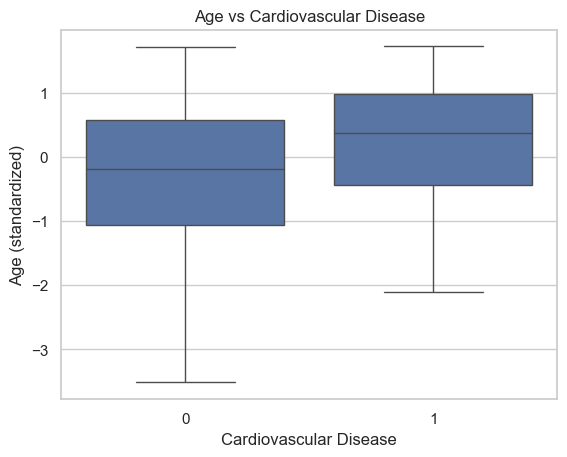

In [14]:
sns.boxplot(x=y, y=X["age_years"])
plt.xlabel("Cardiovascular Disease")
plt.ylabel("Age (standardized)")
plt.title("Age vs Cardiovascular Disease")
plt.show()

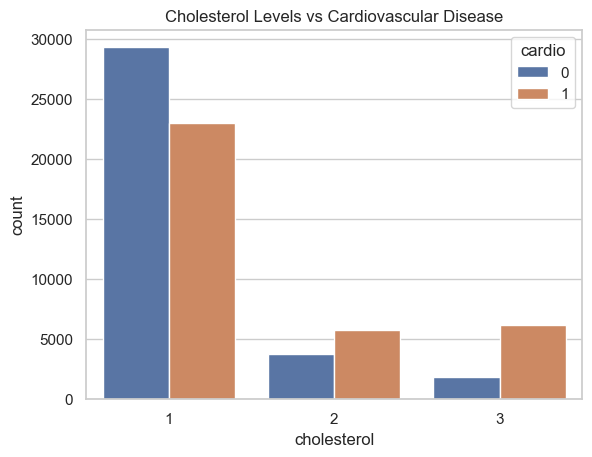

In [15]:
sns.countplot(x="cholesterol", hue=y, data=df)
plt.title("Cholesterol Levels vs Cardiovascular Disease")
plt.show()

# Modeling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [17]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

In [18]:
print("Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance
Accuracy: 0.7131428571428572
ROC-AUC: 0.7780705703903904
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



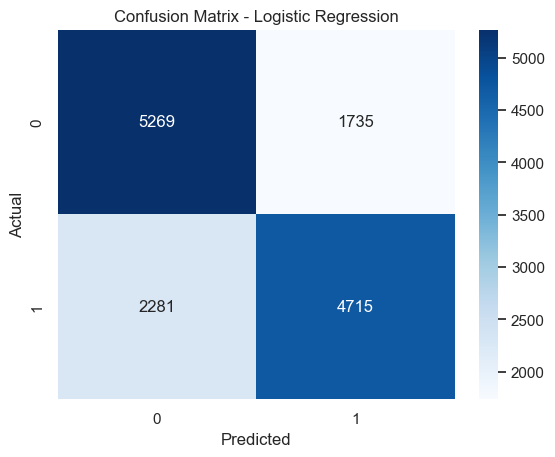

In [19]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [20]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [21]:
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance
Accuracy: 0.7096428571428571
ROC-AUC: 0.7699671799892833
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      7004
           1       0.71      0.70      0.71      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

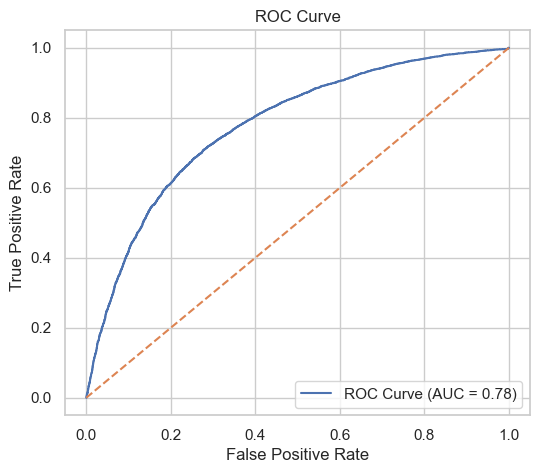

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Model Comparison

In [24]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

results

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.713143,0.778071
1,Random Forest,0.709643,0.769967


# Interpretability

In [25]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df.head(10)

,Feature,Coefficient
3,ap_hi,4.492306
12,pulse_pressure,1.749604
4,ap_lo,1.429334
10,age_years,0.378940
5,cholesterol,0.356189
2,weight,0.288844
0,gender,0.013015
8,alco,-0.038163
7,smoke,-0.039502
11,BMI,-0.058451


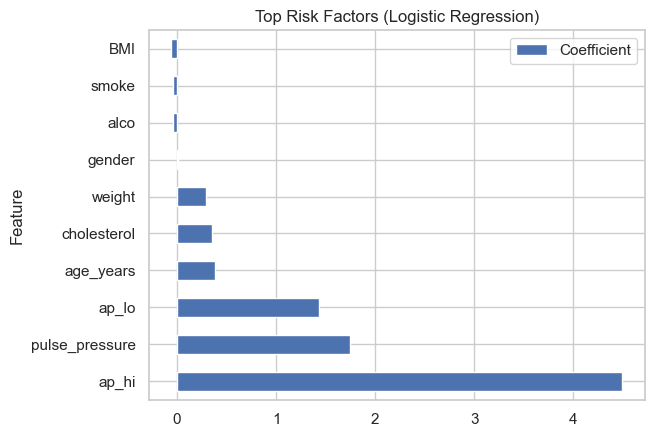

In [26]:
coef_df.set_index("Feature").head(10).plot(kind="barh")
plt.title("Top Risk Factors (Logistic Regression)")
plt.show()

# Precision & Recall Curve

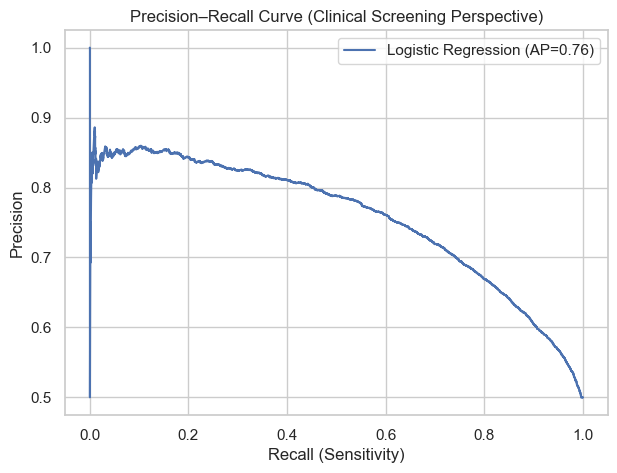

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)
avg_precision = average_precision_score(y_test, y_prob_lr)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"Logistic Regression (AP={avg_precision:.2f})")
plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Clinical Screening Perspective)")
plt.legend()
plt.show()


In [28]:
def evaluate_threshold(threshold):
    y_pred_custom = (y_prob_lr >= threshold).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    return recall, precision, fp, fn


In [29]:
thresholds_to_test = [0.3, 0.4, 0.5]

results = []
for t in thresholds_to_test:
    recall, precision, fp, fn = evaluate_threshold(t)
    results.append([t, recall, precision, fp, fn])

threshold_df = pd.DataFrame(
    results,
    columns=["Threshold", "Recall", "Precision", "False Positives", "False Negatives"]
)

threshold_df


,Threshold,Recall,Precision,False Positives,False Negatives
0,0.3,0.936535,0.579618,4752,444
1,0.4,0.830617,0.652921,3089,1185
2,0.5,0.673957,0.731008,1735,2281


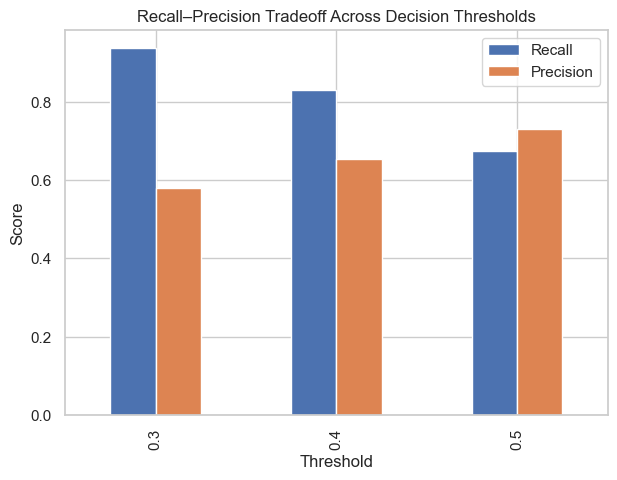

In [30]:
threshold_df.set_index("Threshold")[["Recall", "Precision"]].plot(
    kind="bar",
    figsize=(7, 5)
)
plt.title("Recall–Precision Tradeoff Across Decision Thresholds")
plt.ylabel("Score")
plt.show()


# Conclusion & Future Work

This project shows that interpretable machine learning models can effectively predict cardiovascular disease risk using routine clinical and lifestyle data. 
 
Clinical threshold analysis prioritizing recall better reflects real-world screening needs by reducing missed high-risk cases.  
Key predictive features aligned with established cardiovascular risk factors, supporting medical relevance.  
Future work includes integrating time-series signals, validating on external datasets, and assessing fairness before clinical use.
